<a href="https://colab.research.google.com/github/luckykhan386/pneumonia-detection-through-deep-learning-model/blob/main/pneumonia_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# New Section

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json.json to kaggle.json.json


{'kaggle.json.json': b'{"username":"luckykhan25bme10017","key":"e2f301df8baa5832436c2fcd0155f347"}'}

In [10]:
# Install Kaggle API
!pip install -q kaggle



In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000           4332         81  1.0              
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000          10139        249  1.0              
prince7489/employee-salary-dataset                              Employee Salary Dataset                                   1121  2025-11-16 14:32:04.360000           1385         37  0.9411765        


In [23]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.26G/2.29G [00:18<00:00, 227MB/s]
100% 2.29G/2.29G [00:18<00:00, 135MB/s]


In [24]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [26]:

DATA_DIR = 'chest_xray'

train_dir = os.path.join(DATA_DIR, 'train')
val_dir = os.path.join(DATA_DIR, 'val')
test_dir = os.path.join(DATA_DIR, 'test')

IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [27]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 414ms/step - accuracy: 0.7833 - loss: 0.6083 - val_accuracy: 0.7500 - val_loss: 0.5537
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 402ms/step - accuracy: 0.9065 - loss: 0.2225 - val_accuracy: 0.7500 - val_loss: 0.5189
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 406ms/step - accuracy: 0.9205 - loss: 0.2019 - val_accuracy: 0.8125 - val_loss: 0.2966
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.9247 - loss: 0.1873 - val_accuracy: 0.8125 - val_loss: 0.6703
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 400ms/step - accuracy: 0.9374 - loss: 0.1586 - val_accuracy: 0.9375 - val_loss: 0.1416
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.9422 - loss: 0.1526 - val_accuracy: 0.8750 - val_loss: 0.2164
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.9462 - loss: 0.1422 - val_accuracy: 1.0000 - val_loss: 0.1010
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 488ms/step - accuracy: 0.9490 - loss: 0

In [29]:
print("टेस्ट डेटा पर मॉडल का मूल्यांकन शुरू हो रहा है...")


loss, accuracy = model.evaluate(test_generator)

print(f"\n✅ टेस्ट लॉस (Test Loss): {loss:.4f}")
print(f"✅ टेस्ट एक्यूरेसी (Test Accuracy): {accuracy*100:.2f}%")

टेस्ट डेटा पर मॉडल का मूल्यांकन शुरू हो रहा है...
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.8058 - loss: 0.5383

✅ टेस्ट लॉस (Test Loss): 0.3438
✅ टेस्ट एक्यूरेसी (Test Accuracy): 87.18%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/l

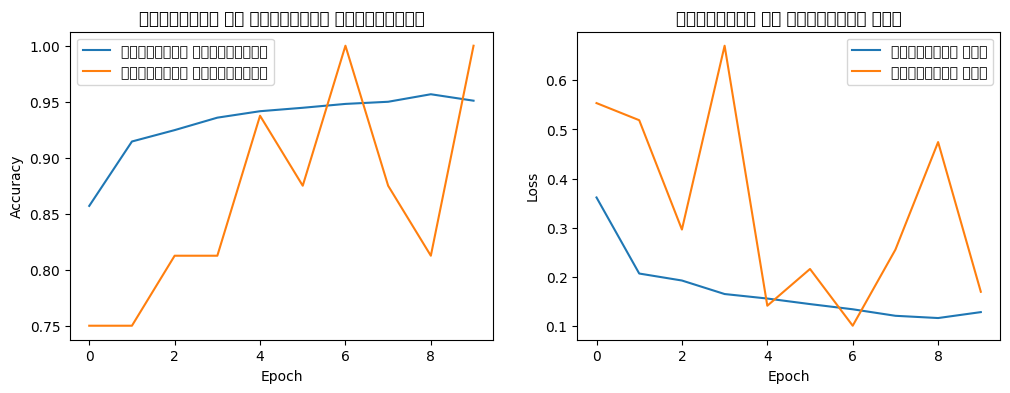

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='ट्रेनिंग एक्यूरेसी')
plt.plot(history.history['val_accuracy'], label='वैलिडेशन एक्यूरेसी')
plt.title('ट्रेनिंग और वैलिडेशन एक्यूरेसी')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='ट्रेनिंग लॉस')
plt.plot(history.history['val_loss'], label='वैलिडेशन लॉस')
plt.title('ट्रेनिंग और वैलिडेशन लॉस')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:

model.save('pneumonia_detection_model.h5')
print("मॉडल सफलतापूर्वक 'pneumonia_detection_model.h5' नाम से सेव हो गया है।")

मॉडल सफलतापूर्वक 'pneumonia_detection_model.h5' नाम से सेव हो गया है।


In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

def predict_pneumonia(image_path, model):

    img = image.load_img(image_path, target_size=(150, 150))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0


    prediction = model.predict(img_array)


    if prediction[0][0] >= 0.5:
        result = "PNEUMONIA"
        probability = prediction[0][0] * 100
    else:
        result = "NORMAL"
        probability = (1 - prediction[0][0]) * 100

    return result, probability, img

In [34]:

test_image_path = os.path.join(test_dir, 'PNEUMONIA', 'person1_testing_10.jpeg')




if os.path.exists(test_image_path):
    result, prob, img = predict_pneumonia(test_image_path, model)


    plt.imshow(img)
    plt.title(f"Prediction: {result} (Confidence: {prob:.2f}%)")
    plt.axis('off')
    plt.show()
else:
    print(f"Error: फ़ाइल नहीं मिली -> {test_image_path}")

Error: फ़ाइल नहीं मिली -> chest_xray/test/PNEUMONIA/person1_testing_10.jpeg


In [38]:
import os


DATA_DIR = 'chest_xray'


test_dir = os.path.join(DATA_DIR, 'test')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


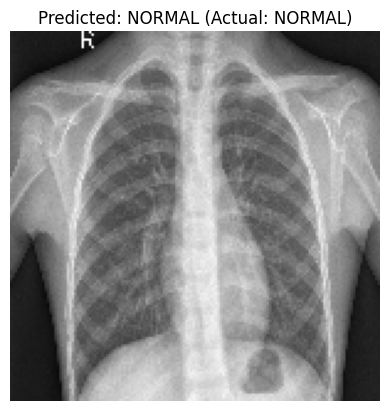

In [39]:

test_images, test_labels = next(test_generator)


predictions = model.predict(test_images)


predicted_class_index = (predictions[0][0] > 0.5).astype(int)


class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]
actual_label = class_labels[int(test_labels[0])]


image_to_plot = (test_images[0] * 255).astype(np.uint8)


plt.imshow(image_to_plot)
plt.title(f"Predicted: {predicted_label} (Actual: {actual_label})")
plt.axis('off')
plt.show()

In [40]:
import tensorflow as tf


loaded_model = tf.keras.models.load_model('pneumonia_detection_model.h5')

print("मॉडल सफलतापूर्वक लोड हो गया है।")

मॉडल सफलतापूर्वक लोड हो गया है।


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


test_generator.reset()
Y_pred = loaded_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)


y_pred_classes = (Y_pred > 0.5).astype(int)


true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


print("### कन्फ्यूजन मैट्रिक्स ###")
conf_matrix = confusion_matrix(true_classes, y_pred_classes)
print(conf_matrix)


print("\n### क्लासिफिकेशन रिपोर्ट ###")
report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print(report)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step
### कन्फ्यूजन मैट्रिक्स ###
[[167  67]
 [ 13 377]]

### क्लासिफिकेशन रिपोर्ट ###
              precision    recall  f1-score   support

      NORMAL       0.93      0.71      0.81       234
   PNEUMONIA       0.85      0.97      0.90       390

    accuracy                           0.87       624
   macro avg       0.89      0.84      0.86       624
weighted avg       0.88      0.87      0.87       624

